# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrBy-2020-10-09.zip
unzip autoriaNumberplateOcrBy-2020-10-09.zip
mv autoriaNumberplateOcrBy-2020-10-09 by
```
or use your own dataset.

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [3]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "by"
VERSION = "2020_10_09_tensorflow_v2.3"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [7]:
class by(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        
        self.EPOCHS = 2

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'T', 'E', '3', 'O', 'K', '4', '5', '2', 'M', 'B', '8', 'I', 'C', 'P', '6', '0', 'H', 'X', 'A', '9', '1', '7'}
Letters val  {'T', '3', 'E', 'O', 'K', '4', '5', '2', 'M', 'B', '8', 'I', 'C', 'P', '6', '0', 'H', 'X', 'A', '9', '1', '7'}
Letters test  {'T', 'E', '3', 'O', 'K', '4', '5', '2', 'M', 'B', 'I', '8', 'C', 'P', '6', '0', 'H', 'X', 'A', '9', '1', '7'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


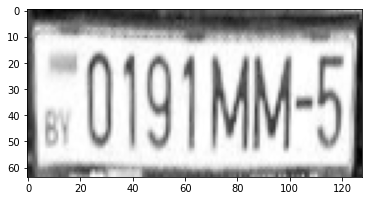

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED


In [8]:
ocrTextDetector = by()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False)

In [6]:
# A = {'M', 'P', 'X', 'I', 'T', 'C', '5', '3', '6', '0', '7', '2', '8', 'С', 'E', 'B', '1', 'H', 'O', 'K', 'A', '4', '9'}
# B = {'P', 'M', 'X', 'I', 'T', 'C', '5', '3', '6', '0', '7', '2', '8', 'E', 'B', '1', 'H', 'O', 'K', 'A', '4', '9'}
# A-B

In [7]:
model = ocrTextDetector.train()


START TRAINING
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
______________________________________________________________________________

In [8]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 4697PT7
True: 			 4537PT7

Predicted: 		 447HT7
True: 			 4447HT7

Predicted: 		 135397
True: 			 AO35397

Predicted: 		 6927CM7
True: 			 5927CM7

Predicted: 		 11IBT4554
True: 			 1IBT4554

Predicted: 		 204AM7
True: 			 2048AM7

Predicted: 		 7007EK7
True: 			 7007EK3

Predicted: 		 9009HX7
True: 			 9069HX7

Predicted: 		 PET5528
True: 			 7PET5528

Predicted: 		 060CE7
True: 			 1533CE7

Predicted: 		 2644EI2
True: 			 2644EI7

Predicted: 		 084IX7
True: 			 6084IX7

Predicted: 		 6199MX7
True: 			 4199MX7

Predicted: 		 A4311PC7
True: 			 4311PC7

Predicted: 		 9679MC5
True: 			 9879MC5

Predicted: 		 3511HAI7
True: 			 3517HI7

Predicted: 		 5522OH7
True: 			 5622OH7

Predicted: 		 3749CB7
True: 			 3729CB7

Predicted: 		 90722CX7
True: 			 9022CX7

Predicted: 		 A714875
True: 			 AT14875

Predicted: 		 901MX5
True: 			 9011MX5

Predicted: 		 4055PX7
True: 			 4655PX7

Predicted: 		 7PBT8316
True: 			 7PBT8318

Predicted: 		 69383CX7
True: 			 6383CX7

P

In [9]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_by_2020_10_09_tensorflow_v2.3.h5


In [10]:
# Train with aug

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'T', 'E', '3', 'O', 'K', '4', '5', '2', 'M', 'B', '8', 'I', 'C', 'P', '6', '0', 'H', 'X', 'A', '9', '1', '7'}
Letters val  {'T', '3', 'E', 'O', 'K', '4', '5', '2', 'M', 'B', '8', 'I', 'C', 'P', '6', '0', 'H', 'X', 'A', '9', '1', '7'}
Letters test  {'T', 'E', '3', 'O', 'K', '4', '5', '2', 'M', 'B', 'I', '8', 'C', 'P', '6', '0', 'H', 'X', 'A', '9', '1', '7'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


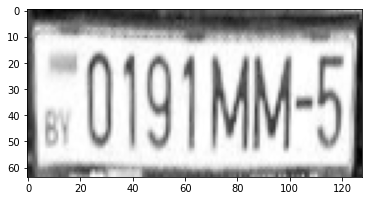

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________

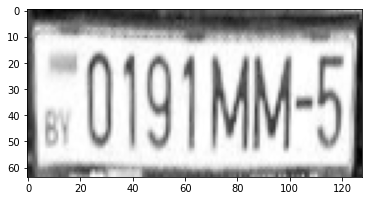

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________

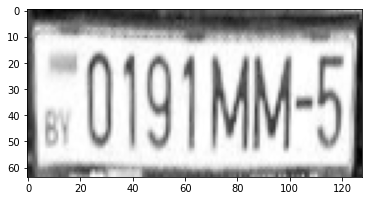

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________

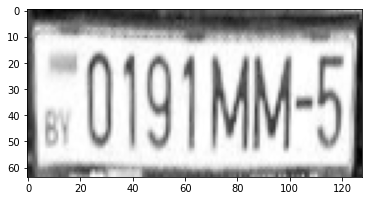

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_________________________________

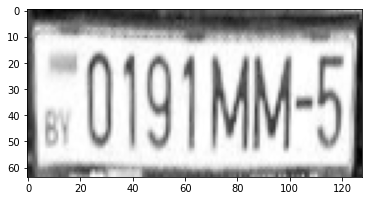

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_________________________________

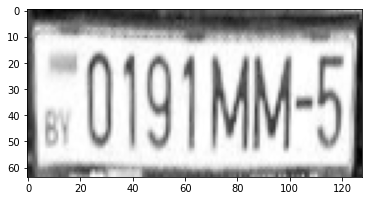

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_________________________________

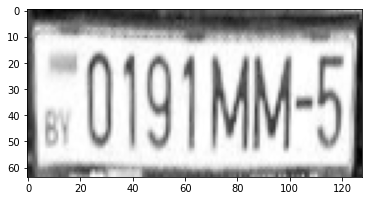

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_________________________________

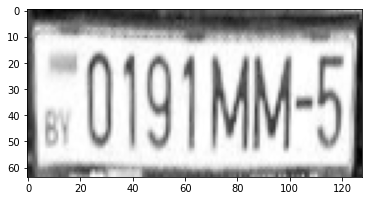

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_________________________________

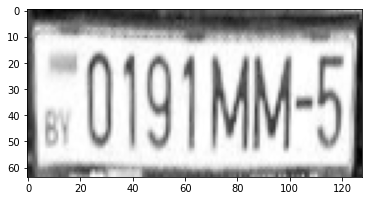

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_________________________________

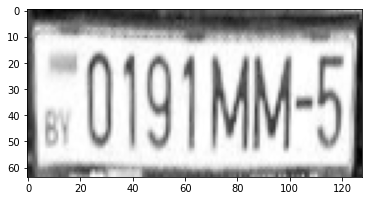

2) the_labels (plate number): 0191MM5 is encoded as [0, 1, 9, 1, 17, 17, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_by (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_by[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_________________________________

In [10]:
for i in range(10):
    ocrTextDetector = by()
    ocrTextDetector.EPOCHS = 2

    model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

    model = ocrTextDetector.train(load_last_weights=True,is_random=1)
    ocrTextDetector.test(verbose=True)

In [11]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 7985KC5
True: 			 7885KC5

Predicted: 		 95550E7
True: 			 9555OE7

Predicted: 		 16241CE7
True: 			 1533CE7

Predicted: 		 0022CX7
True: 			 9022CX7

Predicted: 		 4044OX7
True: 			 4644OX7

Predicted: 		 5CT4576
True: 			 5ICT4576

Predicted: 		 7885KI7
True: 			 7886KI7

Predicted: 		 0505MB5
True: 			 0505MH5

Predicted: 		 8000EM7
True: 			 3000EM7

Predicted: 		 8776HA7
True: 			 0776HA7

Predicted: 		 913EH5
True: 			 9113EH5

Predicted: 		 AP746097
True: 			 AP74607

Predicted: 		 0546IC7
True: 			 0540IC7

Predicted: 		 6518ME7
True: 			 8518ME7

Predicted: 		 2056CI7
True: 			 2066CI7

Predicted: 		 2208CK7
True: 			 2209CK7

Predicted: 		 8985BM7
True: 			 8965BM7
Test processing time: 0.403179407119751 seconds
acc: 0.985973597359736


In [12]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_by_2020_10_09_tensorflow_v2.3.h5


In [9]:
ocrTextDetector.load(RESULT_MODEL_PATH, verbose=False)

In [9]:
ocrTextDetector.load('/home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5', verbose=True)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
____________________________________________________________________________________________

In [8]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir=RESULT_MODEL_PATH)
converter.convert()
converter.save(output_saved_model_dir)

INFO:tensorflow:Linked TensorRT version: (7, 2, 0)
INFO:tensorflow:Loaded TensorRT version: (7, 2, 0)


OSError: SavedModel file does not exist at: /home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5/{saved_model.pbtxt|saved_model.pb}

In [8]:
converter.convert()

OSError: SavedModel file does not exist at: /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_08_tensorflow_v2.2.h5/{saved_model.pbtxt|saved_model.pb}

In [9]:
from NomeroffNet.Base import convert_keras_to_freeze_pb

ImportError: cannot import name 'convert_keras_to_freeze_pb'

In [13]:
RESULT_MODEL_PATH1 = '/var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2'
RESULT_MODEL_PATH_TRT = '/var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2_trt'

In [12]:
#ocrTextDetector.save(RESULT_MODEL_PATH1, verbose=True)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2/assets
SAVED TO /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2


In [14]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir=RESULT_MODEL_PATH1)
converter.convert()
converter.save(RESULT_MODEL_PATH_TRT)

INFO:tensorflow:Linked TensorRT version: (7, 1, 3)
INFO:tensorflow:Loaded TensorRT version: (7, 1, 3)
INFO:tensorflow:Could not find TRTEngineOp_0_0 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_1 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_4 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_3 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_5 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngi